<a href="https://colab.research.google.com/github/ShubhamKanojia360/Shubham360/blob/master/DigitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
from torchvision import transforms , datasets

train = datasets.MNIST('', train=True , download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('', train=False , download=True, transform=transforms.Compose([transforms.ToTensor()]))


trainset=torch.utils.data.DataLoader(train , batch_size=10, shuffle=True)
testset=torch.utils.data.DataLoader(test , batch_size=10, shuffle=True)

In [0]:
import torch.nn as nn 
import torch.nn.functional as F


In [0]:
class Net(nn.Module):

  def __init__(self):           #initializing 4 neuron layers
    super().__init__()
    self.fc1 = nn.Linear(28*28 , 64)
    self.fc2 = nn.Linear(64 , 64)
    self.fc3 = nn.Linear(64 , 64)
    self.fc4 = nn.Linear(64 , 10)

  def forward(self, x):               #feedforward data
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    return F.log_softmax(x, dim=1)       #softmax function

    return x
    


net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
#passing data throught the network

X = torch.rand((28*28))
X = X.view(-1,28*28)   # -1 says that it can be any function so error doesnot show


In [0]:
output = net(X)

In [0]:
output

tensor([[-2.2495, -2.2121, -2.3912, -2.2715, -2.3855, -2.3383, -2.2574, -2.3398,
         -2.3294, -2.2679]], grad_fn=<LogSoftmaxBackward>)

In [0]:
#training the data
import torch.optim as optim 

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
  for data in trainset:
    #data is a batch of features and labels.
    X, y = data
    net.zero_grad()
    output = net(X.view(-1,28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
  print(loss)




tensor(0.1525, grad_fn=<NllLossBackward>)
tensor(0.1136, grad_fn=<NllLossBackward>)
tensor(0.0023, grad_fn=<NllLossBackward>)


In [0]:
#testing the accuracy
correct = 0
total = 0

with torch.no_grad():
  for data in trainset:
    X, y = data
    output = net(X.view(-1, 28*28))
    for idx, i in enumerate(output):      
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

print("Accuracy", round(correct/total*100 , 3),"%")        


Accuracy 97.395 %


In [0]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

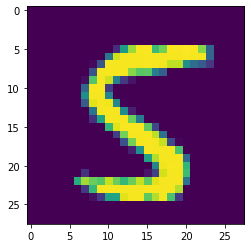

In [0]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view(28,28))
plt.show()

In [0]:
print(torch.argmax(net(X[1].view(-1,28*28))[0]))

tensor(5, grad_fn=<NotImplemented>)
